# Exercise 1

## Question 1

_Initiate the centroids by picking up one point at random per Gaussian. Run k-means
over the data. Provide a different color for each cluster and plot the means of each
clusters._

Text(0.5, 1.0, 'Three blobs')

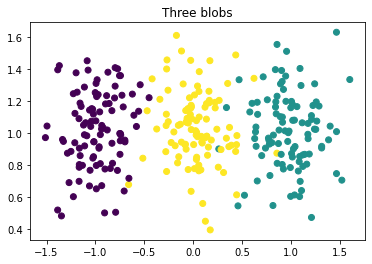

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
import random as rd

X, y = make_blobs(n_samples=300, centers=[[-1,1],[1,1],[0,1]], n_features=2,cluster_std=np.sqrt(0.05))
plt.scatter(X[:,0],X[:,1], c=y)
plt.title("Three blobs")

In [0]:
# Partitioning the samples
# classes is constructed such that classes[j] contains 
# the indexes of the samples belonging to cj.
def partition(X,centers, norm):
  k = len(centers) 
  classes = [[] for _ in range(k)]
  for j in range(k):
    for i in range(len(X)):
      if(norm == 'L2'):
        if(np.argmin([np.linalg.norm(X[i]-centers[k],2)**2 for k in range(k)])==j):
          classes[j].append(i)
      if(norm == 'L1'):
        if(np.argmin([np.linalg.norm(X[i]-centers[k],1) for k in range(k)])==j):
          classes[j].append(i)
  return classes 

# Updating class centers
def update(X,classes,k,method):
  if(method == 'MEAN'):
    centers = [0 for _ in range(k)]
    for i in range(k):
      if(len(classes[i])==0): 
        centers[i] = [100,100] # Eliminating the cluster if there it isn't close to any element
      else:
        centers[i] = (1/len(classes[i]))*sum(X[classes[i][j]] for j in range(len(classes[i])))

  elif(method == 'MEDIAN'):
    centers = [0 for _ in range(k)]
    for i in range(k):
      centers[i] = np.median(X[classes[i]])

  return centers

def cost(X, classes, centers,norm):
  if(norm=='L1'):
    return sum(sum(np.linalg.norm(X[classes[k][i]] - centers[k],1)**2 for i in range(len(classes[k]))) for k in range(len(centers)))
  if(norm=='L2'):
    return sum(sum(np.linalg.norm(X[classes[k][i]] - centers[k],2)**2 for i in range(len(classes[k]))) for k in range(len(centers)))

def kmean(X, threshold, method, norm):
  # Initiating centroids
  centers = random.choice(X[y==0]),random.choice(X[y==1]), random.choice(X[y==2])
  it_num          = 0
  costs           = []
  current_cost    = math.inf
  while(True):
    it_num += 1
    classes = partition(X,centers,norm)
    if(method=='MEAN'):
      centers = update(X,classes,len(centers),'MEAN')
    elif(method=='MEDIAN'):
      centers = update(X,classes,len(centers),'MEDIAN')
    prev_cost    = current_cost
    current_cost = cost(X,classes,centers,norm)
    costs.append(current_cost)
    if(prev_cost-current_cost<threshold): 
      break
  return centers, costs, it_num

def create_data(n_samples,sigma):
  return make_blobs(n_samples, centers=[[-1,1],[1,1],[0,1]], n_features=2,cluster_std=sigma)


  

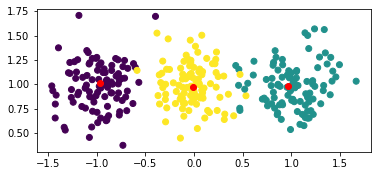

In [3]:
centers,costs,it_num = kmean(X,1e-4,'MEAN','L2')
x_center,y_center = [centers[i][0] for i in range(len(centers))], [centers[i][1] for i in range(len(centers))]
X, y = create_data(300,np.sqrt(0.05))
plt.scatter(X[:,0],X[:,1], c=y)
plt.scatter(x_center,y_center,c="red")
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

---

***Response :*** The mean of each cluster is in the center of the cluster, as expected. 

---

## Question 2

_Plot the cost(t) as a function of the number of iterations t. Repeat 50 times and
consider for each of these experiments the number of iterations T (till convergence).
Provide a histogram on the empirical distribution of the T ’s._

Text(0.5, 1.0, 'Cost as a function of the number of iteration (threshold = 1e-4)')

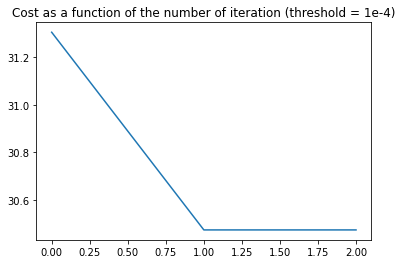

In [4]:
plt.plot(list(range(it_num)),costs)
plt.title("Cost as a function of the number of iteration (threshold = 1e-4)")

---

With std=0.1, the clusters are clearly separable and so the algorithm converges directly. 

---

(array([ 1.,  0., 22.,  0.,  0., 22.,  0.,  4.,  0.,  1.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <a list of 10 Patch objects>)

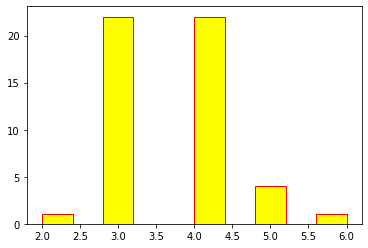

In [5]:
T = []
for _ in range(50):
  initial_centers = random.choice(X[y==0]),random.choice(X[y==1]), random.choice(X[y==2])
  _,_,it_num = kmean(X,1e-4,'MEAN','L2')
  T.append(it_num)

plt.hist(T, color = 'yellow', edgecolor = 'red')


--- 

When we iterate 50 times, we observe that k-means often converges in only 3 or 4 steps, which is not a lot 

---

## Question 3

_Repeat 2. with centroids initiated randomly (centroids could all belong to the same
Gaussian)._

First, we choose our initial centroids amount our point, but not surely one per cluster.

(array([16.,  0.,  0., 23.,  0.,  0.,  9.,  0.,  0.,  2.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <a list of 10 Patch objects>)

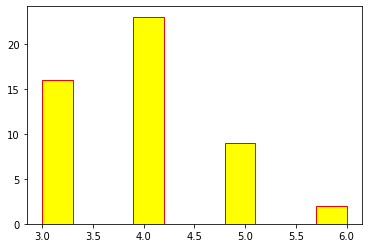

In [14]:
T = []
for _ in range(50):
  initial_centers = random.choice(X),random.choice(X), random.choice(X)
  _,_,it_num = kmean(X,1e-4,'MEAN','L2')
  T.append(it_num)

plt.hist(T, color = 'yellow', edgecolor = 'red')

--- 

***Response :*** We observe that the number of iteration has increased. In fact, it's possible to have two initial centroids in the same cluster and in this case, the algorithm take more steps.

---

Secondly we choose our initial centroids randomly in the square between [-1,-1] and [1,1].

(array([13.,  0.,  0., 20.,  0.,  0., 15.,  0.,  0.,  2.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <a list of 10 Patch objects>)

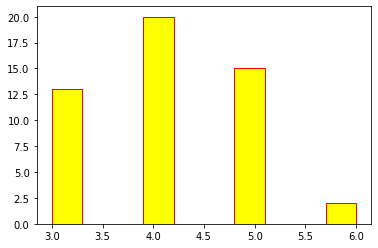

In [13]:
T = []
for _ in range(50):
  initial_centers = np.array([rd.uniform(-1,1),rd.uniform(-1,1)]),np.array([rd.uniform(-1,1),rd.uniform(-1,1)]),np.array([rd.uniform(-1,1),rd.uniform(-1,1)])
  _,_,it_num = kmean(X,1e-4,'MEAN','L2')
  T.append(it_num)

plt.hist(T, color = 'yellow', edgecolor = 'red')

--- 

***Response :*** As the initial centroids are not part from our data, the algorithm takes again more time to converge.

---

## Question 4

_Now we will study the case where clusters are no longer clearly defined. For each
value of σ ∈ {0.1, 0.2, 0.3} repeat 3._

Red : std=0.1, blue : std=0.2, green : std=0.3


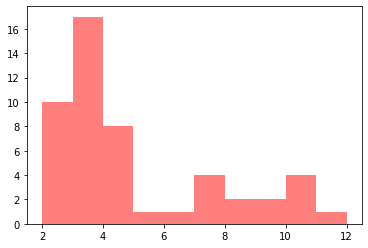

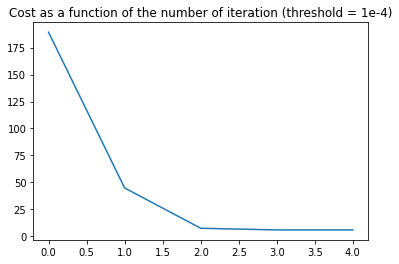

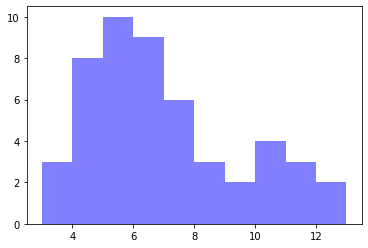

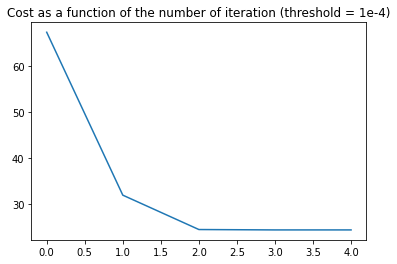

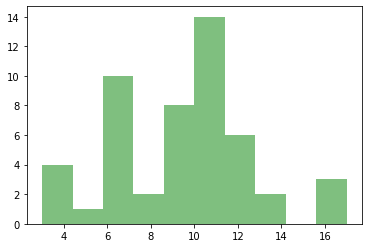

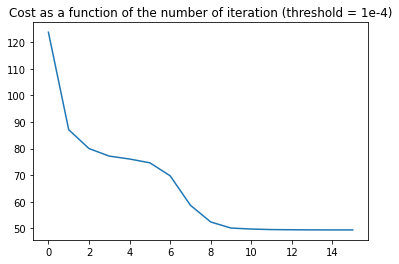

In [16]:
colormap = {0:'red',1:'blue',2:'green'}
print("Red : std=0.1, blue : std=0.2, green : std=0.3")
iteration = 0
for sigma in [0.1,0.2,0.3]:
  X, _ = create_data(300, sigma)
  T = []
  for _ in range(50):
    initial_centers = random.choice(X),random.choice(X), random.choice(X)
    _,costs,it_num = kmean(X,1e-4,'MEAN','L2')
    T.append(it_num)

  plt.hist(T, alpha = 0.5, lw=3, color = colormap[iteration])
  plt.show()
  plt.plot(list(range(it_num)),costs)
  plt.title("Cost as a function of the number of iteration (threshold = 1e-4)")
  plt.show()
  iteration += 1



--- 

***Response :*** We observe what we expected. When the std increases, the data become less separable (as usual) and so the algotithm converges more slowly. 
Also, we can observe that the costs increases a lot, the initial costs and the final ones, which is also logical because the three clusters are not clearly defined and especially because our points are more stretched.

---

## Question 5

_Show that when minimizing the cost over centroids, the centroids that minimize
the cost are indeed the means of their cluster. Hint: consider the cost function
restricted to one cluster and find the optimal centroid (i.e., minimizing the cost of
that cluster)._

We suppose $x_{1},x_{2},...,x_{n}$ to be part from a cluster and we are looking for the best centroid $ \mu $.

The cost function is : $$ f (\mu)= \sum_{i=1}^n ||x_{i}-\mu||^{2} $$

So $ \nabla f(\mu) = \sum_{i=1}^n  -2(x_{i}-\mu) $ 

And $ \nabla f(\mu) = 0 $    iif    $ n\mu = \sum_{i=1}^n x_{i} $. 

So we find that $$ \mu = \frac{1}{n}  \sum_{i=1}^n x_{i} $$ 

Therefore, for each cluster, $\mu$ is the mean of the points of the cluster.

## Question 6 (a)

_What happens if we decided to change the L2 norm to the L1 norm._
_Repeat 3._ 

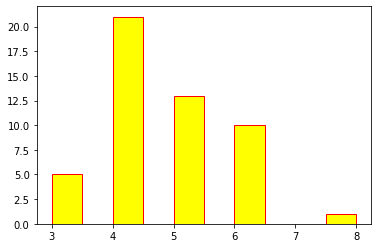

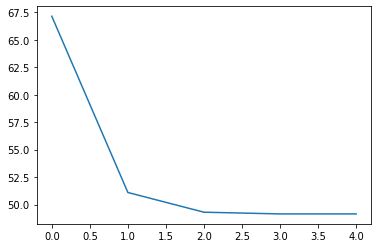

In [17]:
X, y = create_data(300,np.sqrt(0.05))

T = []
for _ in range(50):
  initial_centers = random.choice(X),random.choice(X), random.choice(X)
  _,costs,it_num = kmean(X,1e-4,'MEAN','L1')
  T.append(it_num)
  

plt.hist(T, color = 'yellow', edgecolor = 'red')
plt.show()
plt.plot(list(range(it_num)),costs)
plt.show()

## Question 6 (b)

_Consider now a modified version of K-Means, the K-Median algorithm, where
centroids are now the median vectors instead of the average. Repeat 3. and
compare with (a). What do you observe?_

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


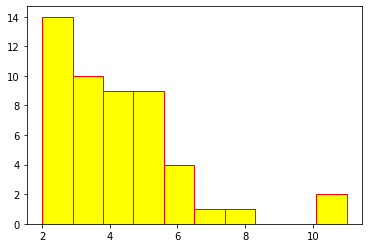

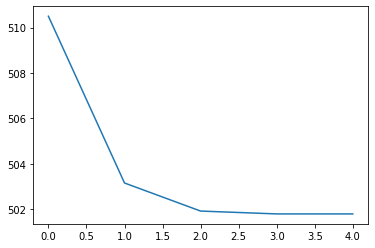

In [0]:
X, _ = make_blobs(n_samples=300, centers=[[-1,1],[1,1],[0,1]], n_features=2,cluster_std=0.1)
T = []
for _ in range(50):
  initial_centers = random.choice(X),random.choice(X), random.choice(X)
  _,costs,it_num = kmean(X,1e-4,'MEDIAN','L1')
  T.append(it_num)


plt.hist(T, color = 'yellow', edgecolor = 'red')
plt.show()
plt.plot(list(range(it_num)),costs)
plt.show()

--- 

**Response :** The number of iterations needed to converge is better than in (a). 

---

## Question 6 (c)

_Through an analogous argument to 5. show that when the L2 distance is
replaced by the L1 distance centroids that minimize the cost are the medians
of their clusters._

We suppose $x_{1},x_{2},...,x_{n}$ in 1-dimension to be part from a cluster and we are looking for the best centroid $ \mu $.

The cost function is : $$ f (\mu)= \sum_{i=1}^n ||x_{i}-\mu|| $$

So $ \ f'(\mu) = -1*| \left\{ i : x_{i} < \mu \right\} | +1*|\left\{ i : x_{i} > \mu \right\} | $

And $ f'(\mu) = 0 $    iif    $$ | \left\{ i : x_{i} < \mu \right\} | = |\left\{ i : x_{i} > \mu \right\} |$$

So we find that $ \mu $  is the median of the points $x_{i}$.

We can iterate the process for every dimension and we find that with the L1-norm, the mean is replaced by the median. 